## OVERVIEW: MACHINE LEARNING -CLUSTERING-

###  In this file you find the last module of this project, using 1) an automathized algorithm (K-neighbours) of unsupervised maching learning, 2) some features of countries with no or low correlation with energy topics, I'd   check if the clustering is the same kind as is from the  3rd module (Statistics).


####  Import libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


#### Read files that are features no related with energy: population, GPD, C02 EMISSIONS, imports and export of energy, population.

In [3]:
label_countries = pd.read_csv('../statistics_data/label_countries.csv')
population = pd.read_csv('../cleaned_data/population.csv')
GDP = pd.read_csv('../cleaned_data/GDP.csv')
C02 = pd.read_csv('../cleaned_data/C02.csv')
imports = pd.read_csv('../cleaned_data/imports.csv')
exports = pd.read_csv('../cleaned_data/exports.csv')


#### Define a function to choose the last year of dataset 2017, transpose the matrix and label correctly the columns

In [4]:
def prepare_df(df,l):
    df = df.loc[df.year==2017].transpose()  
    df.columns = df.iloc[0]
    df.reset_index(inplace=True)
    df = df.rename(columns={'index':'country',2017.0:f'{l}'})
    df.drop(index=0,axis=0,inplace=True)

    return df

#### Merging for these three features: population, GDP and installations of renewables

In [5]:
features = [GDP,population,C02]
names = ['GDP','population','C02','imports','exports']
features_clean = []


for (df,l) in zip(features,names):
    features_clean.append(prepare_df(df,l))
      
for i in (range(len(features_clean)-1)):
    clustering = features_clean[i].merge(features_clean[i+1],how ='inner',on='country')
    features_clean[i+1] = clustering 


## K-means clustering
------------------------------------------------------------

## n = 4 clusters

In [6]:
from sklearn.cluster import KMeans

#remove the country column because the k-means clustering just act with int or float

clusteringk=clustering.drop('country',axis=1)


kmeans = KMeans(n_clusters=4) 
clustering_countries = kmeans.fit(clusteringk)
clusteringk['labels'] = clustering_countries.labels_
clusteringk.head()

year,GDP,population,C02,labels
0,888.84700,43987.190,210.132715,3
1,1216.84700,24650.620,416.246333,1
2,428.47200,8803.741,80.974792,1
3,516.47700,11381.020,115.320900,1
4,6.85708,806.530,0.515209,1


### 1. Need to compare if the unsupervised machine learning clustering with 4 clusters follows the trend we predict in module 3. Statistics_linear_regresion

### from the ML clustering, we take the values of each label 

In [96]:
label_ML = clusteringk.groupby('labels').count()[['GDP']]
label_ML.rename(columns={'GDP':'values'},inplace=True)
label_ML['label']=['green light countries','warning countries','dangerous countries','toxic countries']
label_ML.reset_index(inplace=True)
label_ML.drop('labels',axis=1,inplace=True)
label_ML

year,values,label
0,29,green light countries
1,2,warning countries
2,3,dangerous countries
3,12,toxic countries


### to plot interchange the values of row 0 with row 4. We can do that because this model just clustering, not labeling.

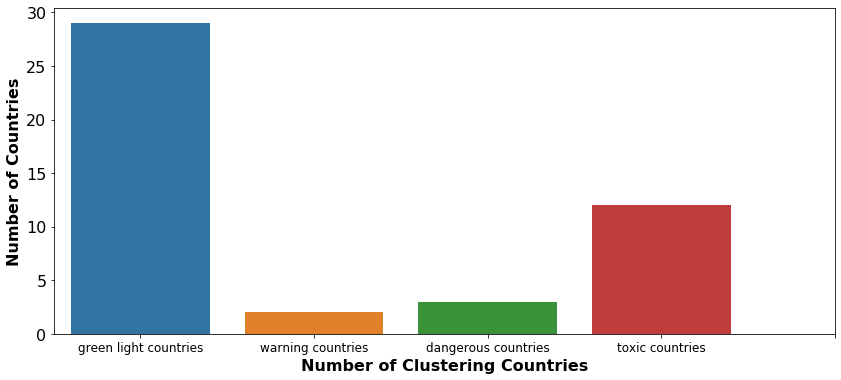

In [97]:

fig, ax = plt.subplots(1,figsize=(14,6))
sns.barplot(['green light countries', 'warning countries', 'dangerous countries', 'toxic countries'],[29,2,3,12])
plt.xticks(np.arange(5),fontsize  =12)
plt.yticks(fontsize  =16)
plt.xlabel('Number of Clustering Countries',fontsize=16,fontweight='bold')
plt.ylabel('Number of Countries', fontsize=16,fontweight='bold')
fig.savefig(f'../machine_learning_data/clustering_countries_barplot.png')

plt.show()

### 2. from the Statistics clustering, we take the values of each label 


In [98]:
label_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
green light countries    23 non-null object
warning countries        9 non-null object
dangerous countries      19 non-null object
toxic countries          136 non-null object
other                    1 non-null object
dtypes: object(5)
memory usage: 5.4+ KB


In [99]:
label = pd.Series(['green light countries','warning countries','dangerous countries','toxic countries'])
values = pd.Series([23,9,19,136])  
frame = { 'label': label, 'values': values } 
  
label_ST = pd.DataFrame(frame) 
label_ST

,label,values
0,green light countries,23
1,warning countries,9
2,dangerous countries,19
3,toxic countries,136


### 3. Normalize both values to compare and plot an histogram of both

In [100]:
import pandas as pd
from sklearn import preprocessing

##normalize the values
ML = np.array(label_ML['values'])
ML = 100*preprocessing.normalize([ML])


ST = np.array(label_ST['values'])
ST = 100*preprocessing.normalize([ST])

##adding Dataframe form
st= pd.DataFrame(ST)
st = st.transpose()
st.rename(columns={0:'st %'},inplace=True)

ml = pd.DataFrame(ML)
ml = ml.transpose()
ml.rename(columns={0:'ml %'},inplace=True)

##merging both dataframes
comparation = st.merge(ml,how='inner',left_index = True, right_index = True )
comparation


,st %,ml %
0,16.484597,91.797896
1,6.450494,6.330889
2,13.617710,9.496334
3,97.474136,37.985336


In [101]:
temp = comparation['ml %'][0]
comparation['ml %'][0] = comparation['ml %'][3]
comparation['ml %'][3] = temp

In [102]:
comparation

,st %,ml %
0,16.484597,37.985336
1,6.450494,6.330889
2,13.617710,9.496334
3,97.474136,91.797896


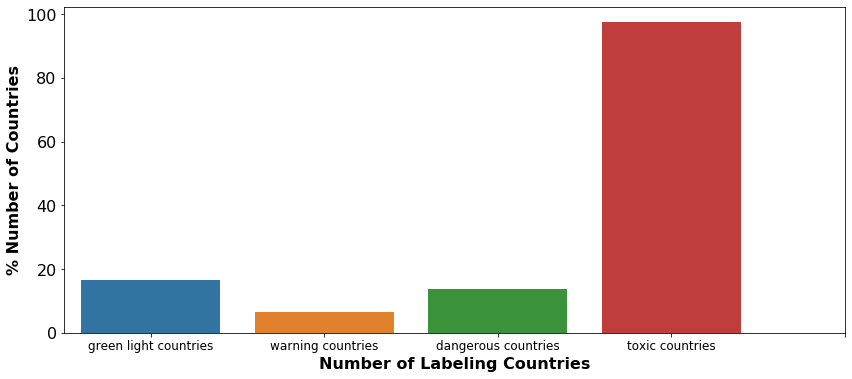

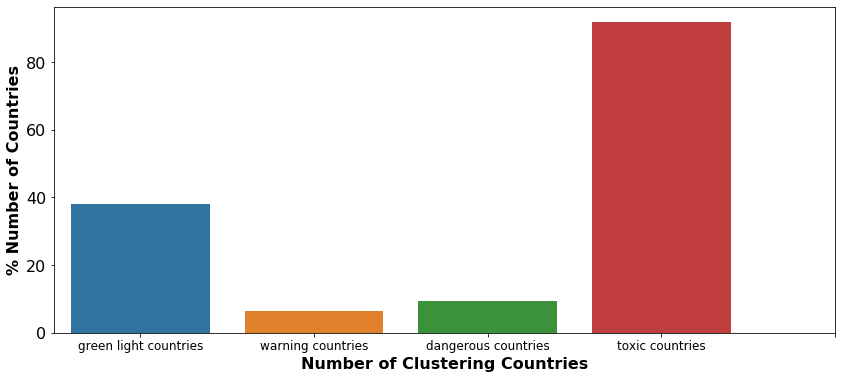

In [103]:
#PLOT PERCENTAGE LABELING COUNTRIES (STATISTICS)
fig2, ax = plt.subplots(1,figsize=(14,6))
sns.barplot(['green light countries', 'warning countries', 'dangerous countries', 'toxic countries'],comparation['st %'])
plt.xticks(np.arange(5),fontsize  =12)
plt.yticks(fontsize  =16)
plt.xlabel('Number of Labeling Countries',fontsize=16,fontweight='bold')
plt.ylabel('% Number of Countries', fontsize=16,fontweight='bold')
fig2.savefig(f'../machine_learning_data/labeling_countries_barplot_percentage.png')

plt.show()



#PLOT PERCENTAGE CLUSTERING COUNTRIES (MACHINE LEARNING)
fig1, ax = plt.subplots(1,figsize=(14,6))
sns.barplot(['green light countries', 'warning countries', 'dangerous countries', 'toxic countries'],comparation['ml %'])
plt.xticks(np.arange(5),fontsize  =12)
plt.yticks(fontsize  =16)
plt.xlabel('Number of Clustering Countries',fontsize=16,fontweight='bold')
plt.ylabel('% Number of Countries', fontsize=16,fontweight='bold')
fig1.savefig(f'../machine_learning_data/clustering_countries_barplot_percentage.png')

plt.show()

# conclusions:
### 1. I checked how good my linear regression is applying a K-model clustering (unsupervised machine learning) for some features with no correlation or lowest I could found. 

### 2. I used for the model 4 clusters, the same numbers of labeling I used for the linear regression. 

### 3. As you can see above, the labels from statistcs and machine learning model fit categoric very well, although there is  more difference in the ML model for '*green light*' and '*dangerous*'. We can't know who label is which country, just the weight distribution